# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Anushka
[nltk_data]     Gunjal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Anushka Gunjal\OneDrive\Desktop\DS LAB MINE\ds mini project\tweets\data_science.csv")
df['tweet'].fillna('', inplace=True)
df.head()

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_17624\2671071323.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Anushka Gunjal\OneDrive\Desktop\DS LAB MINE\ds mini project\tweets\data_science.csv")
C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_17624\2671071323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].fillna('', inplace=True)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241386 entries, 0 to 241385
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               241386 non-null  int64  
 1   conversation_id  241386 non-null  int64  
 2   created_at       241386 non-null  object 
 3   date             241386 non-null  object 
 4   time             241386 non-null  object 
 5   timezone         241386 non-null  int64  
 6   user_id          241386 non-null  int64  
 7   username         241386 non-null  object 
 8   name             241386 non-null  object 
 9   place            354 non-null     object 
 10  tweet            241386 non-null  object 
 11  language         241386 non-null  object 
 12  mentions         241386 non-null  object 
 13  urls             241386 non-null  object 
 14  photos           241386 non-null  object 
 15  replies_count    241386 non-null  int64  
 16  retweets_count   241386 non-null  int6

In [4]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.413860e+05,2.413860e+05,241386.0,2.413860e+05,241386.000000,241386.000000,241386.000000,241386.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.529281e+17,9.528276e+17,530.0,2.346056e+16,1.356678,11.569076,27.964269,0.457102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.104049e+17,3.103971e+17,0.0,1.442948e+17,34.724170,140.701341,751.545541,0.498157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.333963e+09,7.333963e+09,530.0,1.300000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.326473e+17,7.325960e+17,530.0,3.691232e+07,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.975409e+17,9.974605e+17,530.0,3.547840e+08,0.000000,3.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.216005e+18,1.215739e+18,530.0,5.345640e+08,0.000000,9.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.406400e+18,1.406400e+18,530.0,1.378437e+18,5769.000000,24505.000000,150746.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Shape:", df.shape)

Shape: (241386, 36)


In [6]:
print("Columns:", df.columns)

Columns: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


Missing values

In [7]:
df.isnull().sum()


id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
place              241032
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest         241386
dtype: int64

In [8]:
df['tweet'].fillna('', inplace=True)

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_17624\3286817590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].fillna('', inplace=True)


# Text Cleaning Function

In [9]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = text.lower()
    return " ".join(word for word in text.split() if word not in stop_words)

df["clean_text"] = df["tweet"].apply(clean_text)
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_text
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,done never blindly trust abstract press releas...
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,need paradigm shift model centric data centric...
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,using high resolution satellite data computer ...
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,shares four steps help new data scientists del...
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,curricula inherently brittle world demand skil...


In [10]:
all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words)
print("Most common words:", word_freq.most_common(10))

Most common words: [('data', 154098), ('science', 116036), ('amp', 32720), ('via', 17203), ('new', 15744), ('gt', 12382), ('learn', 11378), ('big', 10585), ('learning', 10178), ('analytics', 10092)]


# Distribution of Tweet Word Count

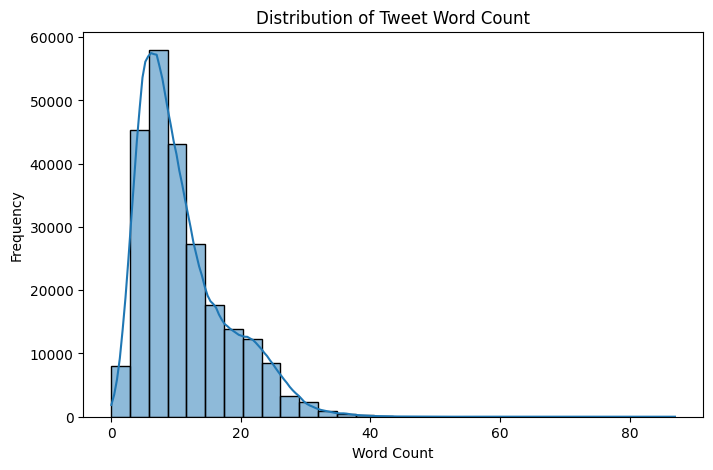

In [11]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['length'] = df['tweet'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Tweet Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


# Sentiment Labeling using TextBlob

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_17624\4293616886.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


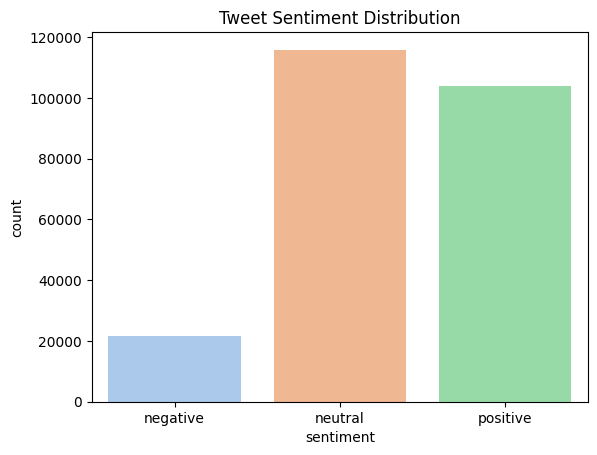

In [12]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

    sns.countplot(x='sentiment', data=df, palette='pastel')

df['sentiment'] = df['clean_text'].apply(get_sentiment)

sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title("Tweet Sentiment Distribution")
plt.show()


**Insight: Bar plot shows the most common words across all cleaned tweets.**

<Axes: ylabel='count'>

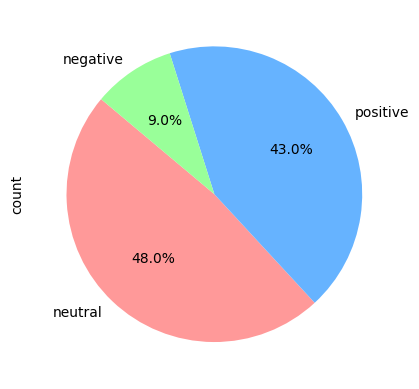

In [13]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])

**Insight: Pie chart shows the distribution of sentiment labels, indicating class balance.**

Negative Tweet count : 9.0%

Positive Tweet count : 43.0%

Neutral Tweet count : 48.0%

# WordCloud

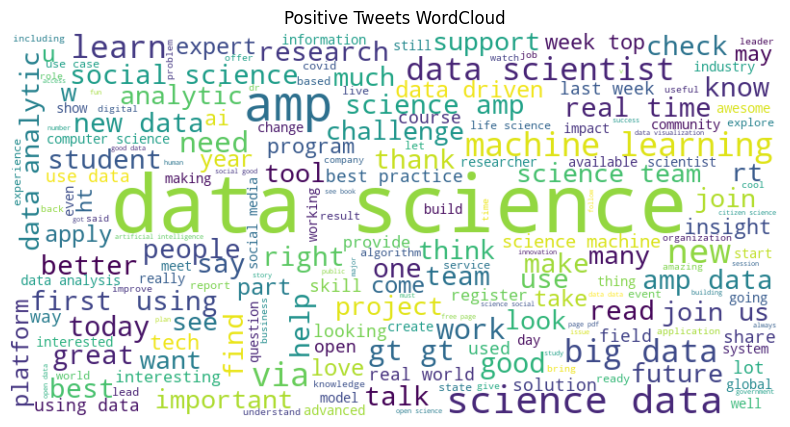

Conclusion: Shows the common words in positive tweets.


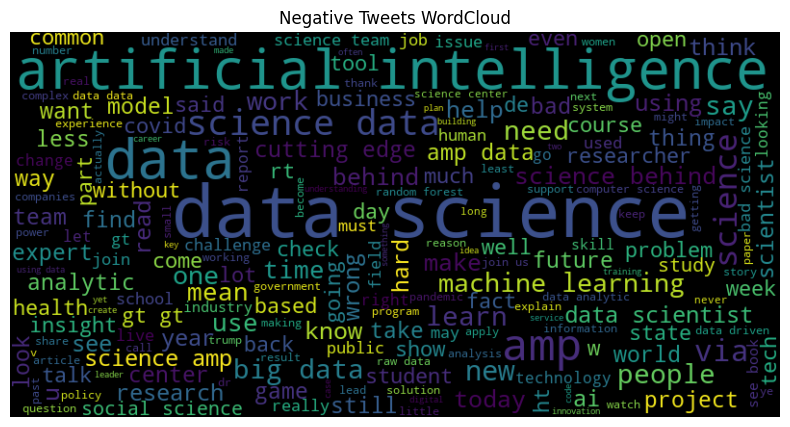

Conclusion: Shows the common words in negative tweets.


In [14]:
pos_text = " ".join(df[df["sentiment"] == "positive"]["clean_text"])
neg_text = " ".join(df[df["sentiment"] == "negative"]["clean_text"])

if pos_text.strip():
    wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud_pos, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Tweets WordCloud")
    plt.show()
    print("Conclusion: Shows the common words in positive tweets.")
else:
    print("No positive tweets to generate WordCloud.")

if neg_text.strip():
    wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(neg_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud_neg, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Tweets WordCloud")
    plt.show()
    print("Conclusion: Shows the common words in negative tweets.")
else:
    print("No negative tweets to generate WordCloud.")

# Feature Extraction (TF-IDF)


In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Multinomial Naive Bayes

Naive Bayes Report (CountVectorizer):
              precision    recall  f1-score   support

    negative       0.71      0.53      0.61      4317
     neutral       0.98      0.75      0.85     23113
    positive       0.74      0.97      0.84     20848

    accuracy                           0.83     48278
   macro avg       0.81      0.75      0.77     48278
weighted avg       0.85      0.83      0.82     48278



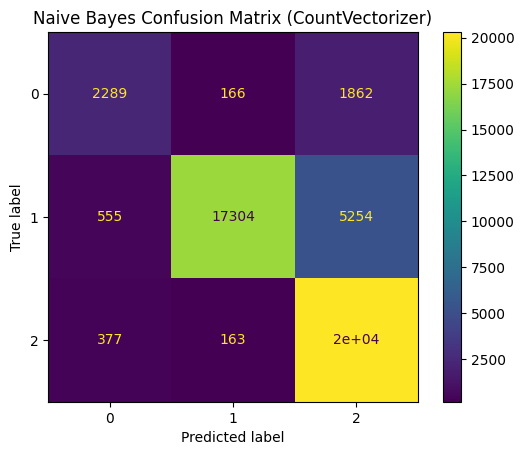

In [17]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluation - Naive Bayes
print("Naive Bayes Report (CountVectorizer):") 
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb)).plot()
plt.title("Naive Bayes Confusion Matrix (CountVectorizer)")
plt.show()

**Insight: Confusion matrix for Naive Bayes with CountVectorizer reveals classification performance.**

# Model Training - Logistic Regression

Logistic Regression Report (CountVectorizer):\n               precision    recall  f1-score   support

    negative       0.95      0.90      0.92      4317
     neutral       0.98      1.00      0.99     23113
    positive       0.99      0.98      0.99     20848

    accuracy                           0.98     48278
   macro avg       0.97      0.96      0.97     48278
weighted avg       0.98      0.98      0.98     48278



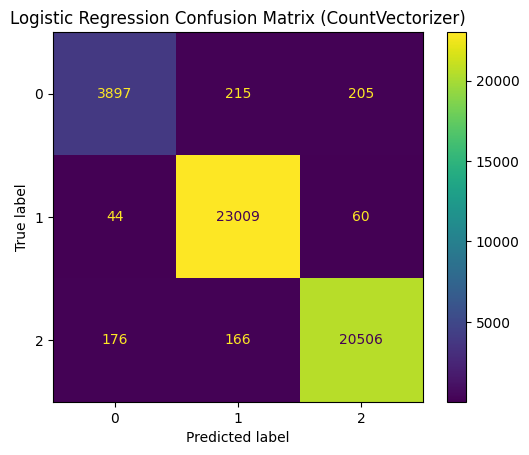

In [18]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation - Logistic Regression
print("Logistic Regression Report (CountVectorizer):\\n", classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix (CountVectorizer)")
plt.show()


**Insight: Confusion matrix for Logistic Regression with CountVectorizer shows model accuracy.**

# TF-IDF Vectorization and Model Evaluation

Naive Bayes Report (TF-IDF):
              precision    recall  f1-score   support

    negative       0.84      0.09      0.16      4317
     neutral       0.95      0.82      0.88     23113
    positive       0.73      0.98      0.84     20848

    accuracy                           0.82     48278
   macro avg       0.84      0.63      0.63     48278
weighted avg       0.85      0.82      0.80     48278

Logistic Regression Report (TF-IDF):
              precision    recall  f1-score   support

    negative       0.95      0.77      0.85      4317
     neutral       0.95      1.00      0.97     23113
    positive       0.98      0.96      0.97     20848

    accuracy                           0.96     48278
   macro avg       0.96      0.91      0.93     48278
weighted avg       0.96      0.96      0.96     48278



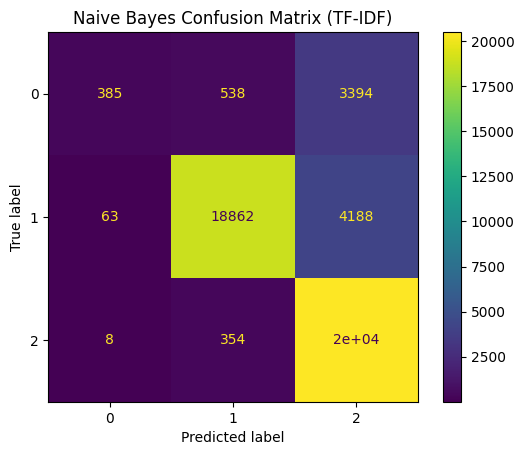

In [19]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

print("Naive Bayes Report (TF-IDF):")
print(classification_report(y_test_tfidf, y_pred_nb_tfidf))
print("Logistic Regression Report (TF-IDF):", )
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))
ConfusionMatrixDisplay(confusion_matrix(y_test_tfidf, y_pred_nb_tfidf)).plot()
plt.title("Naive Bayes Confusion Matrix (TF-IDF)")
plt.show()

**Insight:**

**- Confusion matrix for Naive Bayes with TF-IDF highlights class-wise predictions.**

**- Confusion matrix for Logistic Regression with TF-IDF displays correct vs. incorrect classifications.**

# Try Sample Prediction

In [20]:
sample = ["Data science is amazing and I love learning it!"]
sample_cleaned = [clean_text(s) for s in sample]
sample_vect = vectorizer.transform(sample_cleaned)
print("Sample Tweet Prediction (Logistic Regression):", lr.predict(sample_vect)[0])

Sample Tweet Prediction (Logistic Regression): positive


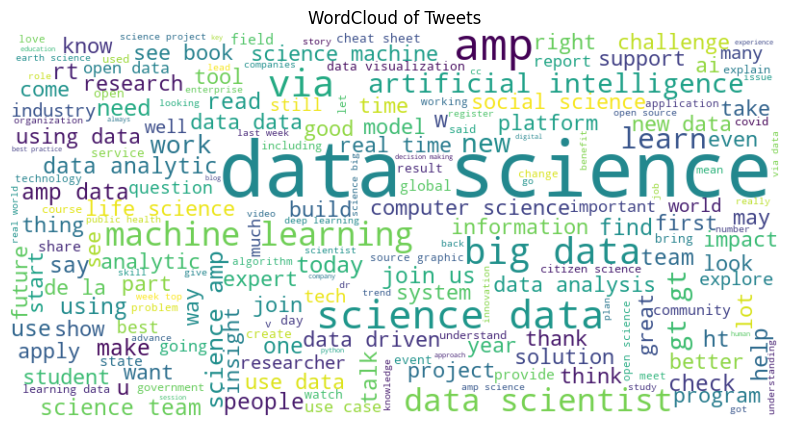

In [21]:
plt.figure(figsize=(10, 5))
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Tweets")
plt.show()
